# Analysis of Air Quality and Life Expectancy

## Introduction
This notebook explores the relationship between air quality, specifically PM2.5 concentrations, and life expectancy across various countries. This analysis is part of a broader project examining the impact of environmental factors on quality-of-life indicators. By comparing air quality with life expectancy, this analysis aims to uncover whether higher pollution levels correspond to changes in life expectancy on a global scale.

### Objectives
1. **Compare Air Quality and Life Expectancy**: Investigate potential correlations between PM2.5 levels and life expectancy across countries over time.
2. **Identify Patterns and Trends**: Analyze any trends that may indicate a connection between air pollution levels and life expectancy, exploring the extent to which environmental quality influences longevity.
3. **Support or Refute Hypothesis**: The hypothesis is that countries with higher PM2.5 concentrations (indicating poorer air quality) will generally have lower life expectancies, suggesting a negative association between pollution and lifespan.

### Data Preparation
The analysis will proceed in several steps:
1. **Import Dependencies**: Load libraries required for data handling and visualization.
2. **Load Datasets**: Import the cleaned air quality and life expectancy datasets.
3. **Merge Data**: Combine both datasets for comparison on a country-by-country and year-by-year basis.

Following data preparation, statistical and visual analyses will be conducted to draw conclusions about the potential impact of air quality on life expectancy.


## Data Import and Preparation

To analyze the relationship between air quality and life expectancy, first import the cleaned air quality and life expectancy datasets. Air quality data is formatted with country codes - convert these to country names for consistency. Then merge the two datasets on country and year to align the data for comparison.

This setup allows us to observe trends in PM2.5 concentrations alongside life expectancy figures over time, providing insight into potential connections between pollution levels and lifespan.


In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint
from scipy import stats
import numpy as np

# Import the function to retrieve country names from country codes
from country_codes import get_country

# Define file paths for the cleaned datasets
csv_airquality = Path("Cleaned_Data/cleaned_airquality.csv")
csv_life_expectancy = Path("Cleaned_Data/cleaned_life_expectancy_data.csv")

# Load the CSV files into DataFrames
airquality_df = pd.read_csv(csv_airquality)
life_expectancy_df = pd.read_csv(csv_life_expectancy)

# Convert country codes to country names in the air quality DataFrame
for index, row in airquality_df.iterrows():
    airquality_df.loc[index, 'Country'] = get_country(airquality_df.loc[index, 'Country'])

# List unique countries in the air quality DataFrame
airquality_countries = airquality_df['Country'].unique().tolist()
print(f"{len(airquality_countries)} countries found in the air quality data.")
pprint(airquality_countries)

# Preview the first few rows of each DataFrame
print("Air Quality DataFrame:")
display(airquality_df.head())

print("Life Expectancy DataFrame:")
display(life_expectancy_df.head())


93 countries found in the air quality data.
['United Arab Emirates',
 'Afghanistan',
 'Argentina',
 'Austria',
 'Australia',
 'Bosnia and Herzegovina',
 'Bangladesh',
 'Belgium',
 'Bulgaria',
 'Bahrain',
 'Brazil',
 'Canada',
 'Switzerland',
 "Cote d'Ivoire",
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Spain',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom of Great Britain and Northern Ireland',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iran (Islamic Republic of)',
 'Iceland',
 'Italy',
 'Jordan',
 'Japan',
 'Kyrgyzstan',
 'Republic of Korea',
 'Kuwait',
 'Kazakhstan',
 "Lao People's Democratic Republic",
 'Sri Lanka',
 'Lithuania',
 'North Macedonia',
 'Mali',
 'Myanmar',
 'Mongolia',
 'Macao',
 'Mexico',
 'The Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Peru',

,Country,Year,PM25
0,United Arab Emirates,2015,118.714286
1,United Arab Emirates,2016,92.000000
2,United Arab Emirates,2018,122.683432
3,United Arab Emirates,2019,111.881940
4,United Arab Emirates,2020,82.900973


Life Expectancy DataFrame:


,Country,Year,Life Expectancy
0,Afghanistan,2015,62.66
1,Afghanistan,2016,63.14
2,Afghanistan,2017,63.02
3,Afghanistan,2018,63.08
4,Afghanistan,2019,63.56


## Merging DataFrames for Analysis

After preparing the air quality data with country names, the data is merged with the life expectancy dataset using "Country" and "Year" columns. This inner join retains only the countries and years available in both datasets, ensuring consistency for comparative analysis.


In [3]:
# Merge the air quality and life expectancy DataFrames on 'Country' and 'Year' columns
# Using an inner join to retain only matching records
air_life_analysis_df = pd.merge(airquality_df, life_expectancy_df, on=["Country", "Year"], how="inner")

# Display the merged DataFrame
air_life_analysis_df


,Country,Year,PM25,Life Expectancy
0,United Arab Emirates,2015,118.714286,79.22
1,United Arab Emirates,2016,92.000000,79.33
2,United Arab Emirates,2018,122.683432,79.63
3,United Arab Emirates,2019,111.881940,79.73
4,United Arab Emirates,2020,82.900973,78.95
...,...,...,...,...
411,Kosovo,2020,69.630102,76.57
412,Kosovo,2021,66.888334,76.81
413,South Africa,2019,55.939217,66.18
414,South Africa,2020,50.737307,65.25


## Data Analysis: Top and Bottom Countries by Air Quality and Life Expectancy

In this section, I analyze the top and bottom-ranked countries in terms of air quality (PM2.5) and life expectancy. By observing these extremes, I aim to identify trends and relationships between pollution levels and life expectancy.

### Top 10 Countries
- **Top 10 Air Quality**: This subset includes countries with the lowest PM2.5 concentrations, representing the best air quality.
- **Top 10 Life Expectancy**: This subset identifies the countries with the highest life expectancy rates.

### Bottom 10 Countries
- **Bottom 10 Air Quality**: This subset includes countries with the highest PM2.5 concentrations, representing the poorest air quality.
- **Bottom 10 Life Expectancy**: This subset identifies the countries with the lowest life expectancy rates.

By comparing these subsets, I can gain insights into whether cleaner air correlates with higher life expectancy.


In [4]:
# Top 10 countries with the best air quality (lowest PM2.5 levels)
analysis_sorted_by_PM25 = air_life_analysis_df.sort_values('PM25', ascending=True)
print("Top 10 Countries by Air Quality:")
display(analysis_sorted_by_PM25[['Country', 'Year', 'PM25']].head(10))

# Top 10 countries with the highest life expectancy
life_expectancy_Analysis = air_life_analysis_df.sort_values('Life Expectancy', ascending=False)
print("Top 10 Countries by Life Expectancy:")
display(life_expectancy_Analysis[['Country', 'Year', 'Life Expectancy']].head(10))

# Bottom 10 countries with the worst air quality (highest PM2.5 levels)
analysis_sorted_by_PM25 = air_life_analysis_df.sort_values('PM25', ascending=False)
print("Bottom 10 Countries by Air Quality:")
display(analysis_sorted_by_PM25[['Country', 'Year', 'PM25']].head(10))

# Bottom 10 countries with the lowest life expectancy
life_expectancy_Analysis = air_life_analysis_df.sort_values('Life Expectancy', ascending=True)
print("Bottom 10 Countries by Life Expectancy:")
display(life_expectancy_Analysis[['Country', 'Year', 'Life Expectancy']].head(10))


Top 10 Countries by Air Quality:


,Country,Year,PM25
77,Switzerland,2021,1.997449
52,Bulgaria,2020,2.000000
76,Switzerland,2020,2.151115
75,Switzerland,2019,2.242184
74,Switzerland,2018,2.414773
72,Switzerland,2016,2.451613
73,Switzerland,2017,3.397959
228,Iceland,2018,15.598901
229,Iceland,2019,16.100292
231,Iceland,2021,16.613030


Top 10 Countries by Life Expectancy:


,Country,Year,Life Expectancy
245,Japan,2020,84.56
375,Singapore,2020,84.47
246,Japan,2021,84.45
244,Japan,2019,84.36
243,Japan,2018,84.21
242,Japan,2017,84.10
241,Japan,2016,83.98
75,Switzerland,2019,83.90
77,Switzerland,2021,83.85
151,Spain,2019,83.83


Bottom 10 Countries by Air Quality:


,Country,Year,PM25
6,Afghanistan,2019,187.457627
36,Bangladesh,2018,159.808989
35,Bangladesh,2017,157.497326
273,Mali,2019,153.750000
39,Bangladesh,2021,153.181556
217,India,2016,147.939673
218,India,2017,143.679880
54,Bahrain,2018,142.812865
37,Bangladesh,2019,142.792493
275,Mali,2021,141.897658


Bottom 10 Countries by Life Expectancy:


,Country,Year,Life Expectancy
79,Cote d'Ivoire,2021,58.60
274,Mali,2020,58.63
179,Guinea,2021,58.89
275,Mali,2021,58.94
78,Cote d'Ivoire,2020,59.03
178,Guinea,2020,59.33
273,Mali,2019,59.66
8,Afghanistan,2021,61.98
399,Uganda,2017,62.12
415,South Africa,2021,62.34


## Correlation Analysis Between Air Quality (PM2.5) and Life Expectancy

To further explore the relationship between air quality and life expectancy, I created a scatter plot of PM2.5 levels versus life expectancy. By analyzing this relationship, I aim to determine whether there is a measurable correlation between air pollution and lifespan.

R-value: -0.57
Linear model: [Life Expectancy] = -0.0989 * [PM2.5] + 82.91


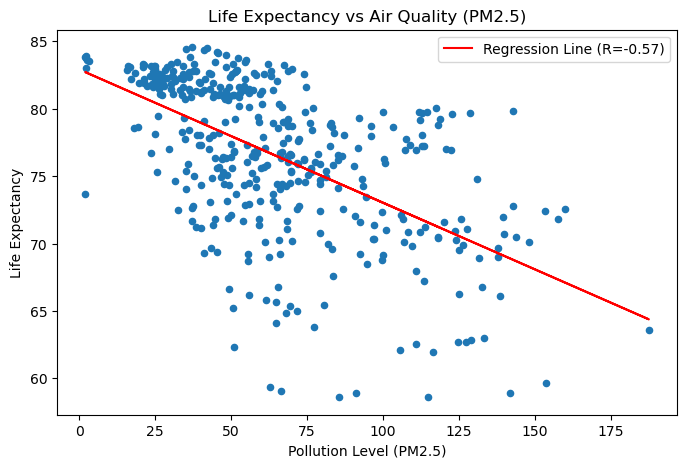

In [5]:
# Scatter plot to visualize the relationship between PM2.5 and Life Expectancy
ax = air_life_analysis_df.plot.scatter(x='PM25', y='Life Expectancy', figsize=(8, 5))
ax.set_xlabel('Pollution Level (PM2.5)')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy vs Air Quality (PM2.5)')

# Perform linear regression for PM2.5 and Life Expectancy
x_data = air_life_analysis_df['PM25']
y_data = air_life_analysis_df['Life Expectancy']
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)
print(f"R-value: {r_value:.2f}")
print(f"Linear model: [Life Expectancy] = {slope:.4f} * [PM2.5] + {intercept:.2f}")

# Plot the regression line
y_regression_line = slope * x_data + intercept
plt.plot(x_data, y_regression_line, 'r', label=f'Regression Line (R={r_value:.2f})')
plt.legend()

# Save the plot to the Images folder
plt.savefig('Images/PM25_and_Life_Expectancy.png')

# Display the plot
plt.show()


##### Analysis of Scatter Plot
The scatter plot indicates a negative correlation between PM2.5 levels and life expectancy. This suggests that, generally, countries with higher PM2.5 values (poorer air quality) tend to have lower life expectancy. However, this inverse relationship does not imply causation—poor air quality is not the sole factor influencing life expectancy. Other variables, such as genetics, lifestyle, diet, and social factors, may also play significant roles in determining life expectancy.

## Changes in Air Quality (PM2.5) and Life Expectancy Over the Years

In this section, I analyze how air quality and life expectancy have changed over time, using box plots to visualize the yearly distributions of PM2.5 levels and life expectancy.

In [8]:
# Display the years from the DataFrame
year_list = air_life_analysis_df['Year'].unique().tolist()
year_list.sort()

year_list


[2015, 2016, 2017, 2018, 2019, 2020, 2021]

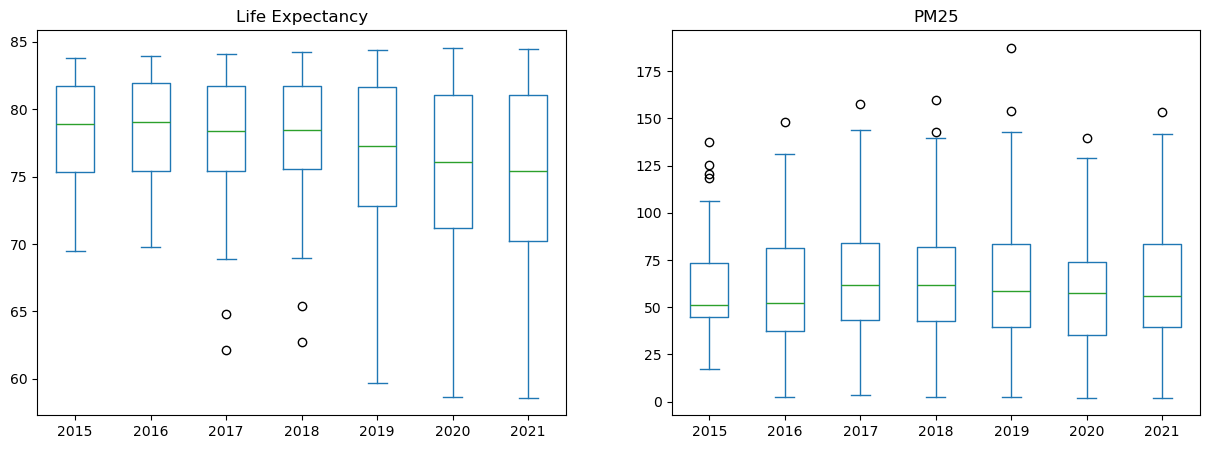

In [9]:

#Box plot graphs
air_life_analysis_df.plot.box('Year',column=['PM25','Life Expectancy'],figsize=(15,5))
plt.show()

##### Box Plot Analysis
- **Life Expectancy**: From 2015 to 2018, the median life expectancy remains around 78-79 years. However, there is a slight decline in the median to 76-77 years in 2019-2020. This shift may indicate broader health factors or external influences affecting life expectancy. Outliers in 2017 and 2018 show countries with significantly different life expectancies compared to others.
- **PM2.5 Levels**: PM2.5 values remain relatively steady between 50-62 µg/m³ across the years, with a slight decrease observed in 2019-2020. Outliers in each year suggest that some countries have significantly higher or lower air quality levels than the global average.

These observations allow for an understanding of the year-over-year trends in both life expectancy and air quality, helping to contextualize the relationship between the two.


## Air Quality Index and Its Impact on Life Expectancy

In this section, I categorize air quality based on PM2.5 concentration levels, assigning an Air Quality Index (AQI) to each country based on average PM2.5 values. The categories are as follows:
- **Good**: PM2.5 between 0 and 12 µg/m³
- **Moderate**: PM2.5 between 12.1 and 35.4 µg/m³
- **Unhealthy for Sensitive Groups (SG)**: PM2.5 between 35.5 and 55.4 µg/m³
- **Unhealthy**: PM2.5 between 55.5 and 150.4 µg/m³
- **Very Unhealthy**: PM2.5 between 150.5 and 250.4 µg/m³
- **Hazardous**: PM2.5 above 250.5 µg/m³


In [10]:
# Group data by country and calculate the mean PM2.5 and Life Expectancy values
grouped_df = air_life_analysis_df.groupby("Country")[["PM25", "Life Expectancy"]].mean()


In [11]:

# Assign air quality categories based on PM2.5 concentration levels
grouped_df.loc[grouped_df['PM25'].between(0, 12), "Air Category"] = 'Good'
grouped_df.loc[grouped_df['PM25'].between(12.1, 35.4), "Air Category"] = 'Moderate'
grouped_df.loc[grouped_df['PM25'].between(35.5, 55.4), "Air Category"] = 'Unhealthy for SG'
grouped_df.loc[grouped_df['PM25'].between(55.5, 150.4), "Air Category"] = 'Unhealthy'
grouped_df.loc[grouped_df['PM25'].between(150.5, 250.4), "Air Category"] = 'Very Unhealthy'
grouped_df.loc[grouped_df['PM25'] > 250.5, "Air Category"] = 'Hazardous'


/var/folders/1g/q9gxtv_j0vxc7tlf0j1712sh0000gn/T/ipykernel_78307/3513926572.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Good' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  grouped_df.loc[grouped_df['PM25'].between(0, 12), "Air Category"] = 'Good'


In [12]:

# Display the categorized DataFrame
print("Grouped Data by Air Quality Category:")
display(grouped_df)


Grouped Data by Air Quality Category:


,PM25,Life Expectancy,Air Category
Country,,,
Afghanistan,138.183605,62.706667,Unhealthy
Algeria,66.671400,75.766667,Unhealthy
Argentina,41.449713,76.450000,Unhealthy for SG
Australia,24.778952,82.785714,Moderate
Austria,47.225332,81.498571,Unhealthy for SG
...,...,...,...
Turkmenistan,61.437212,68.983333,Unhealthy
Uganda,123.892013,62.674000,Unhealthy
Ukraine,42.136913,70.890000,Unhealthy for SG


In [13]:

# Count the occurrences of each air quality category
grouped_counts_df = grouped_df["Air Category"].value_counts()
print("\nAir Quality Category Counts:")
display(grouped_counts_df)



Air Quality Category Counts:


Air Category
Unhealthy           46
Unhealthy for SG    19
Moderate            12
Good                 1
Name: count, dtype: int64

In [14]:

# Calculate the mean life expectancy for each air quality category
mean_life_expectancy = grouped_df.groupby('Air Category')['Life Expectancy'].mean()


In [16]:

# Create a DataFrame from the mean life expectancy values
mean_df = pd.DataFrame({'Air Category': mean_life_expectancy.index, 'Life Expectancy': mean_life_expectancy.values})
mean_df

,Air Category,Life Expectancy
0,Good,83.608333
1,Moderate,81.676167
2,Unhealthy,72.859337
3,Unhealthy for SG,76.774724


In [17]:
# Sort the DataFrame by highest life expectancy
mean_df_sorted = mean_df.sort_values(by='Life Expectancy', ascending=False)
print("\nMean Life Expectancy by Air Quality Category:")
display(mean_df_sorted)


Mean Life Expectancy by Air Quality Category:


,Air Category,Life Expectancy
0,Good,83.608333
1,Moderate,81.676167
3,Unhealthy for SG,76.774724
2,Unhealthy,72.859337


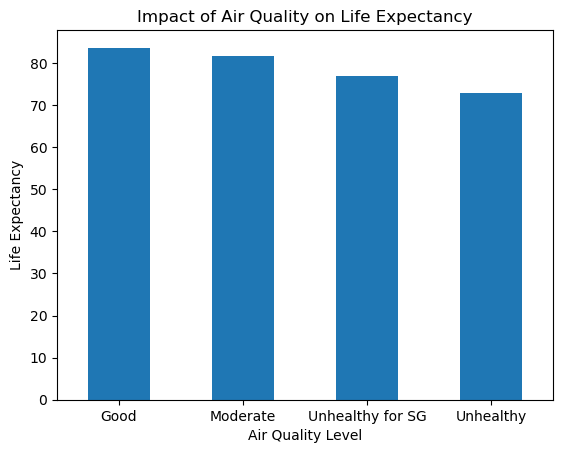

In [18]:
# Plot the bar chart for mean life expectancy by air quality category
mean_df_sorted.plot(x='Air Category', y='Life Expectancy', kind='bar', legend=False)
plt.xlabel('Air Quality Level')
plt.ylabel('Life Expectancy')
plt.title('Impact of Air Quality on Life Expectancy')
plt.xticks(rotation=0)  # Rotate x-axis labels for clarity

# Save the plot to the Images folder
plt.savefig('Images/PM25_and_Life_Expectancy_Bar.png')
plt.show()

##### Analysis
After grouping countries by air quality categories, I calculate the mean life expectancy for each category and display the results in a bar chart. The chart reveals that countries with "Good" and "Moderate" air quality levels tend to have higher life expectancies than those in the "Unhealthy" or worse categories. This trend suggests a link between better air quality and longer life expectancy, though additional factors likely contribute to life expectancy outcomes.

## Comparative Analysis of Air Quality and Life Expectancy: Switzerland vs. Bangladesh

To illustrate how air quality and life expectancy vary in countries with different pollution levels, I compare Switzerland, a country with relatively low PM2.5 levels, to Bangladesh, which has higher PM2.5 levels. This comparison allows for a closer look at the effects of contrasting air quality on life expectancy in two distinct regions.

### Analysis
- **Switzerland**: With one of the lowest average PM2.5 levels, Switzerland offers insight into the life expectancy of populations in countries with high air quality.
- **Bangladesh**: Conversely, Bangladesh has higher PM2.5 levels, offering a contrast that allows us to observe potential impacts of higher pollution on life expectancy.
  
Using line graphs, I visualize trends in PM2.5 levels and life expectancy over the years for both countries.


In [19]:
# Sort countries by highest and lowest air quality (PM2.5 levels)
sort_highest_air_quality = grouped_df.sort_values('PM25')
print("Countries with Highest Air Quality (Lowest PM2.5):")
display(sort_highest_air_quality.head())

sort_lowest_air_quality = grouped_df.sort_values('PM25', ascending=False)
print("Countries with Lowest Air Quality (Highest PM2.5):")
display(sort_lowest_air_quality.head())

# Retrieve mean values for Switzerland and Bangladesh for comparison
grouped_df = air_life_analysis_df.groupby("Country")[["PM25", "Life Expectancy"]].mean()
Switzerland_data = grouped_df.loc["Switzerland"]
Bangladesh_data = grouped_df.loc["Bangladesh"]

print("Switzerland Data:")
display(Switzerland_data)

print("Bangladesh Data:")
display(Bangladesh_data)


Countries with Highest Air Quality (Lowest PM2.5):


,PM25,Life Expectancy,Air Category
Country,,,
Switzerland,2.442515,83.608333,Good
Iceland,18.172118,82.843333,Moderate
Estonia,23.917182,78.064000,Moderate
Finland,24.328351,81.730000,Moderate
Australia,24.778952,82.785714,Moderate


Countries with Lowest Air Quality (Highest PM2.5):


,PM25,Life Expectancy,Air Category
Country,,,
Bangladesh,146.713882,72.101667,Unhealthy
Afghanistan,138.183605,62.706667,Unhealthy
Mali,136.781907,59.076667,Unhealthy
Pakistan,132.073882,66.376667,Unhealthy
India,130.447049,69.891429,Unhealthy


Switzerland Data:


PM25                2.442515
Life Expectancy    83.608333
Name: Switzerland, dtype: float64

Bangladesh Data:


PM25               146.713882
Life Expectancy     72.101667
Name: Bangladesh, dtype: float64

### Life Expectancy and PM2.5 Trends: Switzerland

In this section, I examine Switzerland’s life expectancy and PM2.5 levels over the years. Switzerland, known for its clean air, shows consistently low PM2.5 levels, allowing us to observe the trends in life expectancy in a high air quality environment.


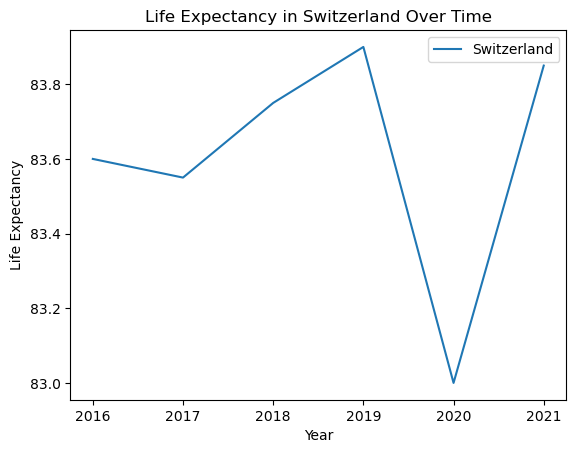

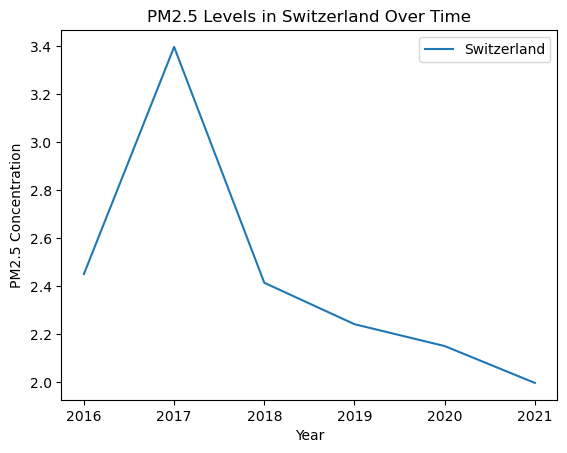

In [20]:
# Line graphs for Switzerland showing trends in Life Expectancy and PM2.5 levels over the years
country = 'Switzerland'
country_df_swiss = air_life_analysis_df.loc[air_life_analysis_df['Country'] == country, :]

# Plot life expectancy trend for Switzerland
country_df_swiss.plot.line(x='Year', y='Life Expectancy', label=country)
plt.title(f'Life Expectancy in {country} Over Time')
plt.ylabel('Life Expectancy')
plt.savefig('Images/Year_and_Life_Expectancy_Switzerland.png')
plt.show()

# Plot PM2.5 trend for Switzerland
country_df_swiss.plot.line(x='Year', y='PM25', label=country)
plt.title(f'PM2.5 Levels in {country} Over Time')
plt.ylabel('PM2.5 Concentration')
plt.savefig('Images/Year_and_PM25_Switzerland.png')
plt.show()


## Life Expectancy and PM2.5 Trends: Bangladesh

This section examines Bangladesh’s life expectancy and PM2.5 levels over the years. With higher PM2.5 levels, Bangladesh provides a contrast to Switzerland, allowing us to observe life expectancy trends in a lower air quality environment.

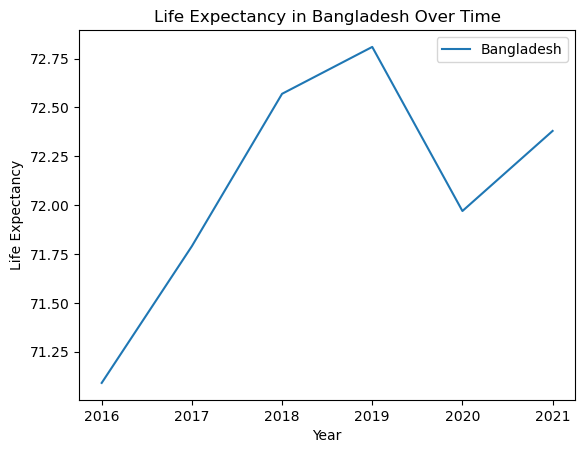

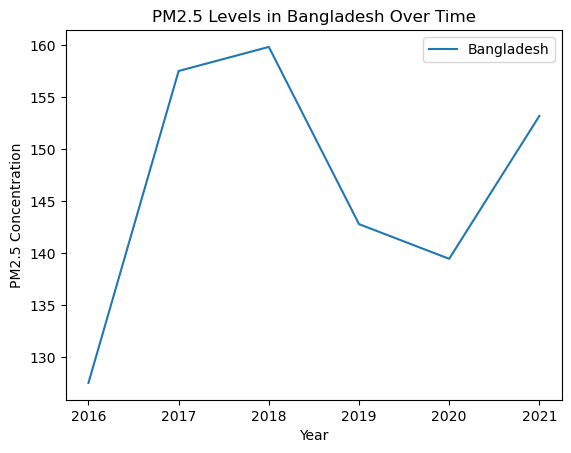

In [21]:
# Line graphs for Bangladesh showing trends in Life Expectancy and PM2.5 levels over the years
country = 'Bangladesh'
country_df_bangladesh = air_life_analysis_df.loc[air_life_analysis_df['Country'] == country, :]

# Plot life expectancy trend for Bangladesh
country_df_bangladesh.plot.line(x='Year', y='Life Expectancy', label=country)
plt.title(f'Life Expectancy in {country} Over Time')
plt.ylabel('Life Expectancy')
plt.savefig('Images/Year_and_Life_Expectancy_Bangladesh.png')
plt.show()

# Plot PM2.5 trend for Bangladesh
country_df_bangladesh.plot.line(x='Year', y='PM25', label=country)
plt.title(f'PM2.5 Levels in {country} Over Time')
plt.ylabel('PM2.5 Concentration')
plt.savefig('Images/Year_and_PM25_Bangladesh.png')
plt.show()


### Comparative Analysis of Air Quality and Life Expectancy Trends in Switzerland and Bangladesh

The line graphs above illustrate the changes in air quality (measured by PM2.5) and life expectancy for Switzerland and Bangladesh from 2016 to 2021. By analyzing these two countries, which represent opposite ends of the air quality spectrum, we can observe potential relationships between air quality and life expectancy.

#### Switzerland
- **PM2.5 Levels**: Switzerland maintains relatively low PM2.5 levels, with a general decline in pollution over the years, reaching its lowest in 2021. The highest PM2.5 concentration observed is just over 3.4 µg/m³, which is well within the "Good" air quality category.
- **Life Expectancy**: Switzerland's life expectancy remains high, hovering around 83.5 to 84 years, with a slight dip in 2020. This temporary decline could reflect global factors, such as the COVID-19 pandemic, rather than a direct result of changes in PM2.5 levels.

#### Bangladesh
- **PM2.5 Levels**: Bangladesh exhibits significantly higher PM2.5 levels, reaching over 160 µg/m³ in 2018. While there is some fluctuation, PM2.5 levels remain high throughout the period, well above the threshold for "Very Unhealthy" air quality.
- **Life Expectancy**: Despite high pollution levels, life expectancy in Bangladesh shows an upward trend from 2016 to 2019, peaking at around 72.8 years. However, there is a noticeable dip in 2020, followed by a slight recovery in 2021. Similar to Switzerland, this dip could be influenced by external factors rather than solely by air quality.

#### Key Observations
- **Correlation Between Air Quality and Life Expectancy**: While Switzerland’s lower PM2.5 levels align with a higher life expectancy, and Bangladesh’s higher pollution levels align with a lower life expectancy, these graphs do not establish a direct causative relationship. Other factors, such as healthcare, socioeconomic conditions, and lifestyle, likely contribute to life expectancy in both countries.
- **Impact of External Factors**: Both countries experience a dip in life expectancy in 2020, suggesting that global factors (e.g., the COVID-19 pandemic) may have influenced these values regardless of air quality trends.
- **Trend Consistency**: Switzerland’s life expectancy remains relatively stable with minimal fluctuation, while Bangladesh’s life expectancy shows more variability alongside higher and fluctuating PM2.5 levels.

This comparison provides a snapshot of how air quality and life expectancy may interact but also highlights the complexity of these relationships, underscoring the need for a multi-faceted approach in analyzing life expectancy trends.


## Conclusion

The analysis above reveals that countries with lower levels of PM2.5 (categorized as "Good" or "Moderate" air quality) generally have higher life expectancies compared to countries with higher PM2.5 levels. This suggests that air quality does have an impact on life expectancy; however, it is important to note that air quality is not the sole or primary factor influencing how long people live.

Life expectancy is shaped by a complex interplay of factors, including genetics, lifestyle choices (such as exercise and diet), social interactions, healthcare access, and various environmental conditions. While this analysis highlights a correlation between air quality and life expectancy across different countries, it does not establish causation.

In summary, while improved air quality may contribute to a longer lifespan, it is only one piece of a larger puzzle. This study demonstrates the potential influence of PM2.5 levels on life expectancy, but further research incorporating additional variables is needed to gain a comprehensive understanding of the factors driving life expectancy globally.
